# K-means clustering

The notebook aims to study and implement a k-means clustering using "sklearn". The iris dataset will be used to identify clusters automatically using the K-means method.


## Acknowledgments

- Used dataset: https://archive.ics.uci.edu/ml/datasets/iris

- Inquiries: mauricio.antelis@tec.mx


# Importing libraries

In [7]:
# Define where you are running the code: colab or local
RunInColab          = True     # (False: no  | True: yes)

# If running in colab:
if RunInColab:
    # Mount your google drive in google colab
    from google.colab import drive
    drive.mount('/content/drive')

    # Find location
    #!pwd
    #!ls
    #!ls "/content/drive/My Drive/Colab Notebooks/MachineLearningWithPython/"

    # Define path del proyecto
    Ruta            = "/content/drive/My Drive/Colab Notebooks/NotebooksProfessor/"

else:
    # Define path del proyecto
    Ruta            = ""

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Importing data

In [26]:
# Dataset url
url = "datasets/iris.csv"

# Load the dataset
df = pd.read_csv(Ruta + url)

# Define the col names for the iris dataset
df.columns = ['sepal.length','sepal.width','petal.length','petal.width','variety']


# Undertanding and preprocessing the data

1. Get a general 'feel' of the data


In [27]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


2. Drop rows with any missing values


In [28]:

dataset = df.dropna()

print(dataset.shape)

(150, 5)


3. Encoding the class label categorical column: from string to num


In [29]:
# Encoding the categorical column
dataset = dataset.replace({"variety": {"Setosa":0, "Versicolor":1, "Virginica":2}})
#Visualize the dataset
dataset

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


Now the label/category is numeric


4. Discard columns that won't be used


In [15]:
# # Drop out non necesary columns
# dataset.drop(['Sepal_Length', 'Sepal_Width'],axis='columns',inplace=True)
#
# #Visualize the dataset
# dataset


5. Scatter plot of the data

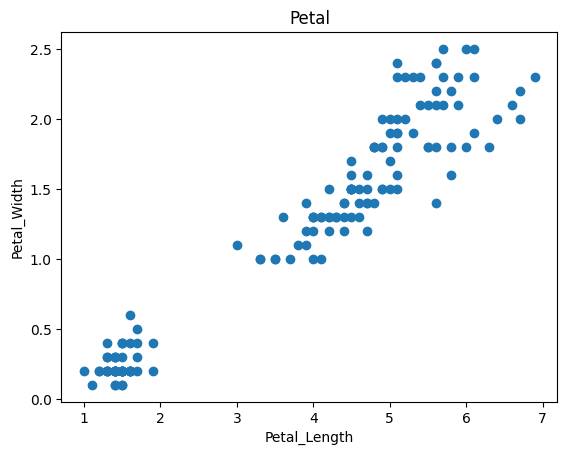

In [30]:
plt.scatter(dataset["petal.length"],dataset["petal.width"])
plt.title('Petal')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.show()

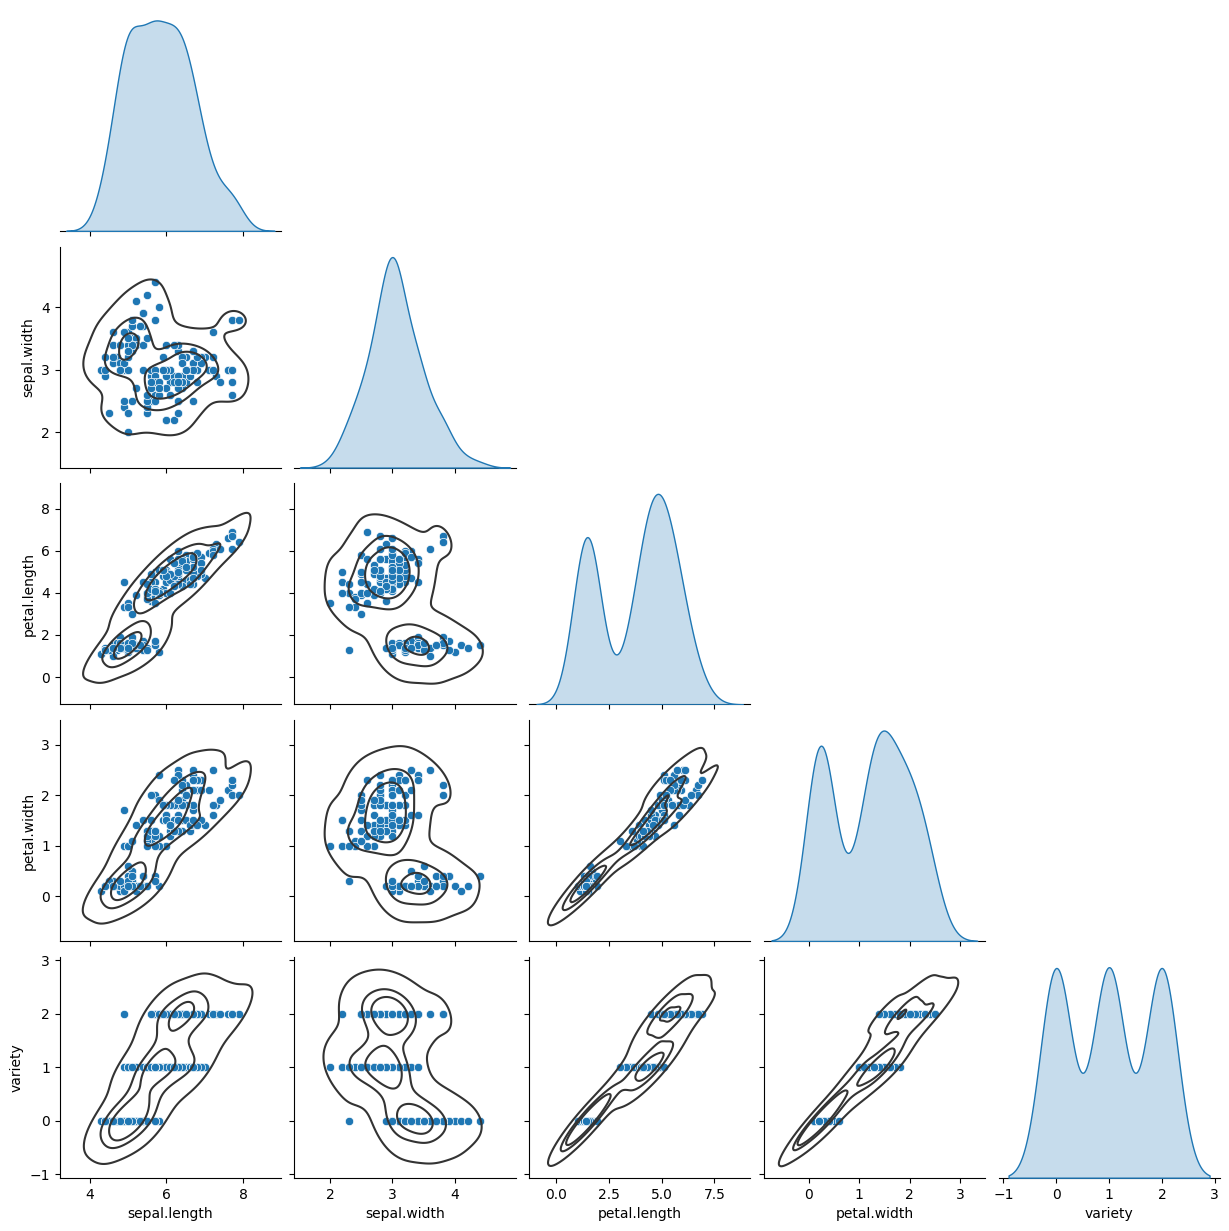

In [31]:
g = sns.pairplot(dataset, corner=True,diag_kind="kde")
g.map_lower(sns.kdeplot, levels=4, color=".2")
plt.show()

6. Scatter plot of the data asigning each point to the cluster it belongs to ¡¡

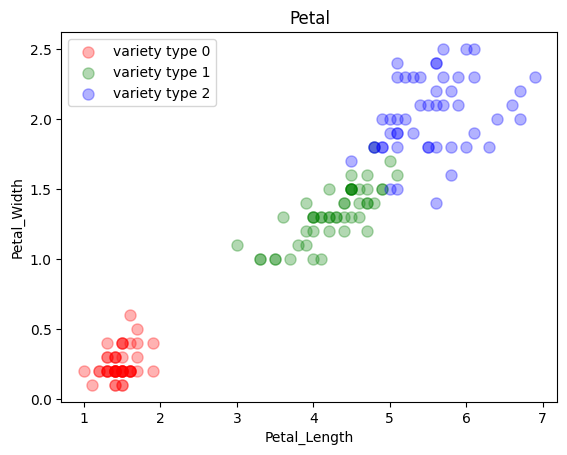

In [32]:
# Get dataframes for each real cluster
df1 = dataset[dataset.variety == 0]
df2 = dataset[dataset.variety == 1]
df3 = dataset[dataset.variety == 2]

#Scatter plot for each real cluster
plt.scatter(df1['petal.length'],df1['petal.width'],label='variety type 0',c='r',marker='o', s=64, alpha=0.3)
plt.scatter(df2['petal.length'],df2['petal.width'],label='variety type 1',c='g',marker='o', s=64, alpha=0.3)
plt.scatter(df3['petal.length'],df3['petal.width'],label='variety type 2',c='b',marker='o', s=64, alpha=0.3)

plt.title('Petal')
plt.xlabel('Petal_Length')
plt.ylabel('Petal_Width')
plt.legend()
plt.show()

Recall that for this dataset we know in advance the class to which each point belongs to

# Kmeans clustering

Kmeans clustering

In [36]:
# Import sklearn KMeans
from sklearn.cluster import KMeans
# Define number of clusters
k=3
km = KMeans(n_clusters=k, n_init="auto")

# Do K-means clustering (assing each point in the dataset to a cluster)
FlowerPredicted = km.fit_predict(dataset[['petal.length', 'petal.width', 'sepal.length', 'sepal.width']])

# Print estimated cluster of each point in the dataset
FlowerPredicted


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 2, 2, 2,
       2, 2, 2, 1, 1, 2, 2, 2, 2, 1, 2, 1, 2, 1, 2, 2, 1, 1, 2, 2, 2, 2,
       2, 1, 2, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 2, 1, 2, 2, 1], dtype=int32)

NOTE: the lables of the estimated clusters do not agree with the lables in the real labels, therefore, it will be important to pair the labels of the real and estimated clusters

In [ ]:
# Manual pairing the labels of the real and estimated clusters


In [43]:
# Add a new column to the dataset with the cluster information
df.insert(5,'FlowerPredicted',FlowerPredicted)
df

,sepal.length,sepal.width,petal.length,petal.width,variety,FlowerPredicted
0,5.1,3.5,1.4,0.2,Setosa,0
1,4.9,3.0,1.4,0.2,Setosa,0
2,4.7,3.2,1.3,0.2,Setosa,0
3,4.6,3.1,1.5,0.2,Setosa,0
4,5.0,3.6,1.4,0.2,Setosa,0
...,...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica,2
146,6.3,2.5,5.0,1.9,Virginica,1
147,6.5,3.0,5.2,2.0,Virginica,2
148,6.2,3.4,5.4,2.3,Virginica,2


In [55]:
# Laber of the estimated clusters
#km = KMeans(n_clusters=k, n_init="auto")
df['cluster'] = FlowerPredicted
print(df)

     sepal.length  sepal.width  petal.length  petal.width    variety  \
0             5.1          3.5           1.4          0.2     Setosa   
1             4.9          3.0           1.4          0.2     Setosa   
2             4.7          3.2           1.3          0.2     Setosa   
3             4.6          3.1           1.5          0.2     Setosa   
4             5.0          3.6           1.4          0.2     Setosa   
..            ...          ...           ...          ...        ...   
145           6.7          3.0           5.2          2.3  Virginica   
146           6.3          2.5           5.0          1.9  Virginica   
147           6.5          3.0           5.2          2.0  Virginica   
148           6.2          3.4           5.4          2.3  Virginica   
149           5.9          3.0           5.1          1.8  Virginica   

     FlowerPredicted  cluster  
0                  0        0  
1                  0        0  
2                  0        0  
3      

In [61]:
# Cluster centroides
centroides = km.cluster_centers_

print("Centroides de los clústeres:")
print(centroides)


Centroides de los clústeres:
[[4.075      1.2625     5.62083333 2.69166667]
 [1.5        0.28214286 5.24285714 3.66785714]
 [5.25555556 2.15555556 6.56666667 3.15555556]
 [6.475      2.075      7.625      3.0875    ]
 [1.41363636 0.2        4.70454545 3.12272727]
 [4.975      1.8125     6.         2.74375   ]
 [4.56842105 1.42105263 6.41578947 2.93684211]
 [3.275      1.025      5.         2.3       ]
 [5.80833333 2.2        6.84166667 3.18333333]
 [5.5625     1.85       6.4        2.8       ]]


In [62]:
# Sum of squared error (sse) of the final model
sse = km.inertia_

print(f'Sum of Squared Errors (SSE) del modelo final: {sse}')

Sum of Squared Errors (SSE) del modelo final: 27.462118791296415


In [63]:
# The number of iterations required to converge
num_iterations = km.n_iter_

print(f'Número de iteraciones requeridas para converger: {num_iterations}')

Número de iteraciones requeridas para converger: 6


<span style='color:Blue'> **Important remarks**  </span>

- The number of each cluster is randomly assigned
- The order of the numer in each cluster is random

# Plot estimated clusters

Plot estimated clusters

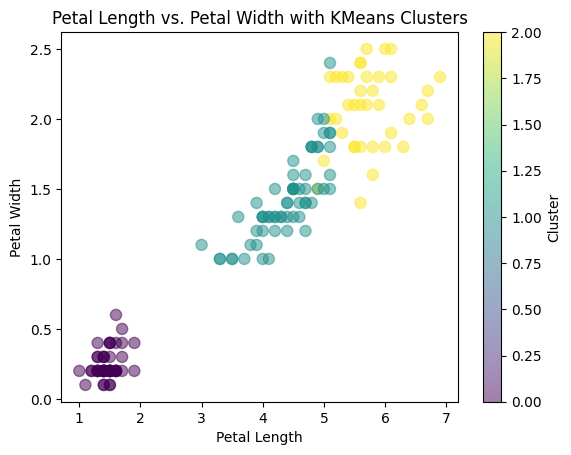

In [56]:
plt.scatter(df['petal.length'], df['petal.width'], c=df['cluster'], cmap='viridis', marker='o', s=64, alpha=0.5)
plt.title('Petal Length vs. Petal Width with KMeans Clusters')
plt.xlabel('Petal Length')
plt.ylabel('Petal Width')
plt.colorbar(label='Cluster')
plt.show()

## Plot both real and estimated clusters to check for errors

Choose the k after which the sse is minimally reduced


<span style='color:Blue'> **Important remarks**  </span>

- Note that for K=2 ...
- Note that for K=3 ...



In [64]:
km_2 = KMeans(n_clusters=2, n_init="auto", random_state=0)
km_2.fit(dataset[['petal.length', 'petal.width', 'sepal.length', 'sepal.width']])
sse_2 = km_2.inertia_

km_3 = KMeans(n_clusters=3, n_init="auto", random_state=0)
km_3.fit(dataset[['petal.length', 'petal.width', 'sepal.length', 'sepal.width']])
sse_3 = km_3.inertia_

print(f"SSE for k=2: {sse_2}")
print(f"SSE for k=3: {sse_3}")

SSE for k=2: 152.34795176035797
SSE for k=3: 78.85566582597727


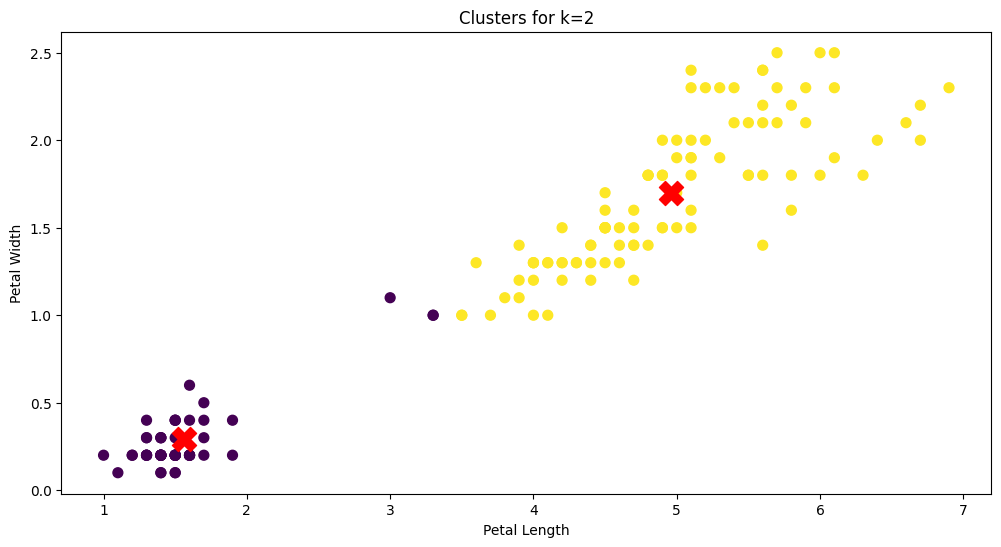

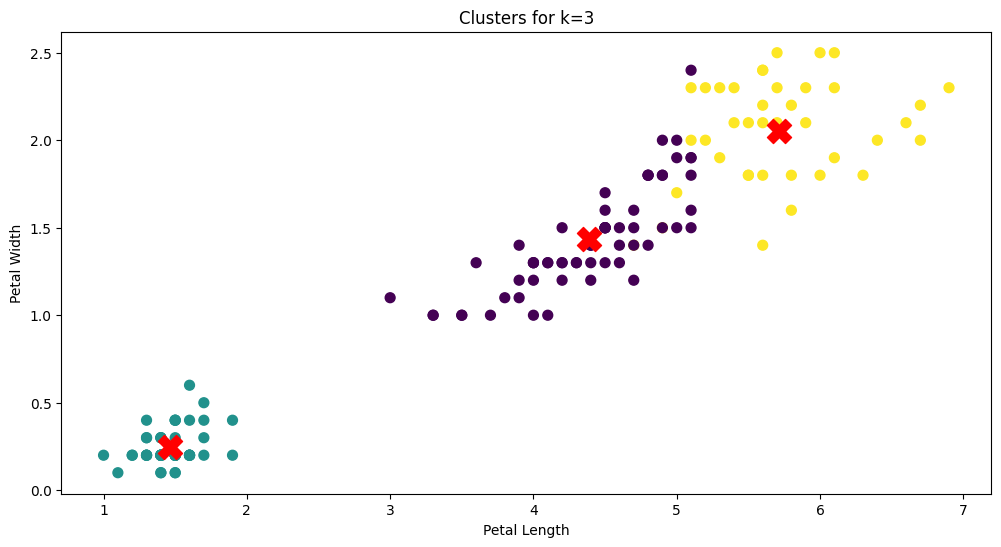

In [65]:
def plot_clusters(dataset, model, k):
    plt.figure(figsize=(12, 6))

    # Predice los clústeres
    labels = model.labels_

    # Grafica los clústeres
    plt.scatter(dataset['petal.length'], dataset['petal.width'], c=labels, cmap='viridis', marker='o', s=50)
    plt.scatter(model.cluster_centers_[:, 0], model.cluster_centers_[:, 1], s=300, c='red', marker='X')  # Centroides
    plt.title(f'Clusters for k={k}')
    plt.xlabel('Petal Length')
    plt.ylabel('Petal Width')
    plt.show()

# Graficar para k=2
plot_clusters(dataset, km_2, 2)

# Graficar para k=3
plot_clusters(dataset, km_3, 3)

# Selecting K: elbow plot

Check the acurracy of the model using k-fold cross-validation

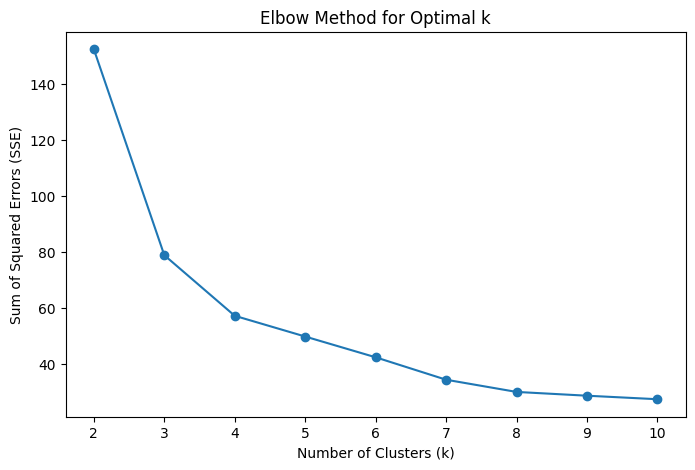

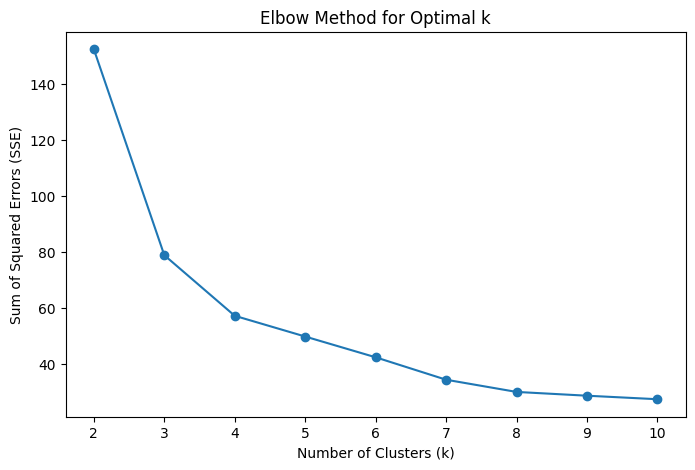

In [67]:
# Intialize a list to hold sum of squared error (sse)
sse = []
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Valores de k a probar
X = dataset[['petal.length', 'petal.width', 'sepal.length', 'sepal.width']]

# Define values of k
for k in k_values:
    km = KMeans(n_clusters=k, n_init="auto", random_state=0)
    km.fit(X)
    sse.append(km.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()

# For each k
# Inicializa una lista para guardar el SSE
sse = []

# Define valores de k a probar
k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]  # Puedes ajustar estos valores según sea necesario

# Define los datos
X = dataset[['petal.length', 'petal.width', 'sepal.length', 'sepal.width']]

# Para cada valor de k
for k in k_values:
    # Ajusta el modelo KMeans con el número de clústeres k
    km = KMeans(n_clusters=k, n_init="auto", random_state=0)
    km.fit(X)

    # Calcula el SSE (Suma de Errores Cuadrados) y lo guarda en la lista
    sse.append(km.inertia_)

# Grafica el elbow plot para visualizar la selección de k
plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.show()


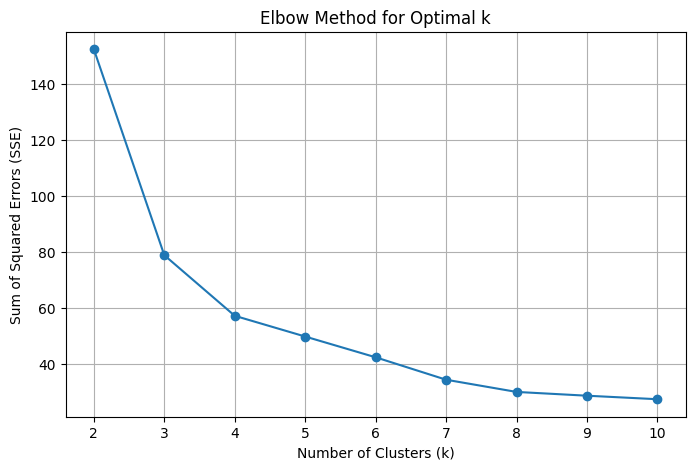

In [72]:
# Plot sse versus k
sse = []

k_values = [2, 3, 4, 5, 6, 7, 8, 9, 10]

X = dataset[['petal.length', 'petal.width', 'sepal.length', 'sepal.width']]

# Para cada valor de k
for k in k_values:
    km = KMeans(n_clusters=k, n_init="auto", random_state=0)
    km.fit(X)

    sse.append(km.inertia_)

assert len(k_values) == len(sse), "La longitud de k_values y sse debe ser la misma"

plt.figure(figsize=(8, 5))
plt.plot(k_values, sse, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Sum of Squared Errors (SSE)')
plt.xticks(k_values)
plt.grid(True)
plt.show()


# Final remarks

- The number of each cluster need to be assigned assigned

- The order of the number in each cluster is random

- If there is no information about the number of clusters k, then use the elbow plot method to choose the best number of clusters k